# 텐서플로우 기초

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC4/blob/main/gg-57-텐서플로우기초.ipynb"><img src="https://github.com/swkim01/DSAC4/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC4/blob/main/gg-57-텐서플로우기초.ipynb"><img src="https://github.com/swkim01/DSAC4/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

# Tensorflow 1.0

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
msg = tf.constant('Hello!!')
session = tf.Session()
print(session.run(msg))

b'Hello!!'


In [2]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

z = x + y

session = tf.Session()

values = {x: 2.0, y: 3.0}

result = session.run([z], values)
print(result)


[5.0]


In [ ]:
## 선형예측 예


In [ ]:
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

In [ ]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)
print(session.run(linear_model,{x:[1,2,3,4]}))

[0.         0.3        0.6        0.90000004]


In [ ]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(session.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

23.660002


In [ ]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
session.run(init) 
for i in range(500):
    session.run(train, {x:[1,2,3,4], y:[0,-1,-2,-3]})
    if i%100 == 0:
        print(i, session.run([W, b]))


0 [array([-0.21999997], dtype=float32), array([-0.456], dtype=float32)]
100 [array([-0.84270465], dtype=float32), array([0.5375326], dtype=float32)]
200 [array([-0.9528499], dtype=float32), array([0.86137295], dtype=float32)]
300 [array([-0.98586655], dtype=float32), array([0.9584459], dtype=float32)]
400 [array([-0.9957634], dtype=float32), array([0.98754394], dtype=float32)]


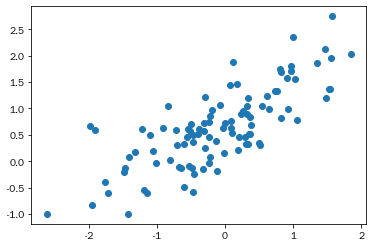

In [ ]:
n = 100
np.random.seed(42)
x = np.random.randn(n)
y = 0.7 * x + 0.7    # w = 0.7, b = 0.7
y = y + np.random.randn(n) * 0.5

plt.scatter(x,y)

0.23469523 0.78438365 0.701566


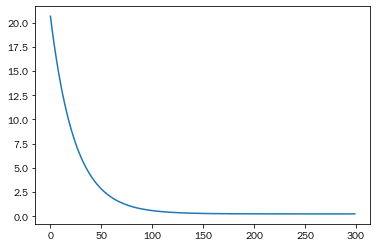

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

n = 100
x = np.random.randn(n)
y = 0.7 * x + 0.7    # w = 0.7, b = 0.7
y = y + np.random.randn(n) * 0.5

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(5.0)
b = tf.Variable(-1.0)

# Graph
y_pred = X * W + b       # hypothesis
cost = tf.reduce_mean(tf.square(y_pred - Y))

#############
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#############

lossHistory = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(300):
        sess.run(train, feed_dict = {X: x, Y: y})
        cost_val, W_val, b_val = sess.run([cost, W, b], feed_dict = {X: x, Y: y})
        lossHistory.append(cost_val)

print(cost_val, W_val, b_val)
plt.plot(lossHistory)

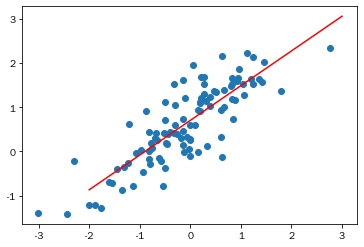

In [ ]:
plt.scatter(x, y)
xx = np.linspace(-2,3, 100)
yy = W_val * xx + b_val
plt.plot(xx, yy, c='r')

## 텐서플로우 함수 사용 (실행 X)

In [ ]:
import tensorflow as tf
import numpy as np
# 독립변수로 x 하나만 정의한다
features =[tf.contrib.layers.real_valued_column("x", dimension=1)]
# 예측 알고리즘으로 선형회귀 알고리즘을 선택했다
estimator = tf.contrib.learn.LinearRegressor(feature_columns=features)
# 독립변수와 종속변수 값을 제시하고 1000번 학습을 시행하도록 하며 한번에 4회씩 시행한다
x = np.array([1.,2.,3.,4.])
y = np.array([0.,-1.,-2.,-3.])
input_fn = tf.contrib.learn.io.numpy_input_fn({"x":x}, y, batch_size=4, num_epochs=1000)
# 훈련 데이터를 사용해서 1000번 학습단계를 수행한다
estimator.fit(input_fn=input_fn, steps=1000)
# 결과를 본다
estimator.evaluate(input_fn=input_fn)

AttributeError: module 'tensorflow' has no attribute 'contrib'

# Tensorflow 2.0
- 커널 재실행 (eager 실행 활성화)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
tf.__version__

'2.6.0'

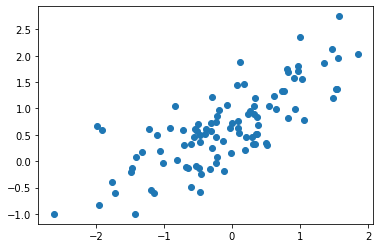

In [3]:
n = 100
np.random.seed(42)
x = np.random.randn(n)
y = 0.7 * x + 0.7    # w = 0.7, b = 0.7
y = y + np.random.randn(n) * 0.5

plt.scatter(x,y)

In [4]:
print(x, y)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

499 :  0.6295519 0.704174


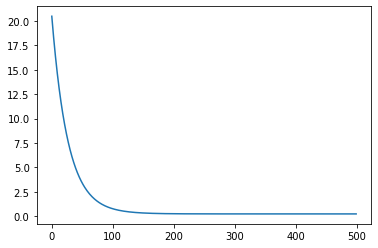

In [5]:
W, b = tf.Variable(5.0), tf.Variable(-1.0)  # randomly chosen

lossHistory = []
learning_rate = 0.01

for i in range(500):
    with tf.GradientTape() as tape:
        y_pred = W * x + b
        cost = tf.reduce_mean(tf.square(y_pred - y))

    W_grad, b_grad = tape.gradient(cost, [W, b])
    # W_grad = tf.reduce_mean((y_pred - y) * x)
    # b_grad = tf.reduce_mean(y_pred - y) 

    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    lossHistory.append(cost)

print(i, ": ", W.numpy(), b.numpy())
plt.plot(lossHistory)

### Linear Regression using Keras

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [10]:
n = 1000
np.random.seed(42)
x = np.random.randn(n)
y = 0.7 * x + 0.7    # w = 0.7, b = 0.7
y = y + np.random.randn(n) * 0.5

model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='linear'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.1), loss=['mse'], metrics=["mae"])
history = model.fit(x, y, epochs=300, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


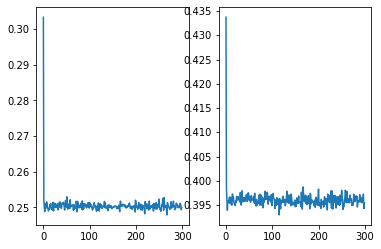

In [11]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['mae'])

In [ ]:
model = Sequential()
model.add(Dense(2, input_shape=(1,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.01), loss=['mse'], metrics=["mae"])
history = model.fit(x, y, epochs=1000, verbose=0)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


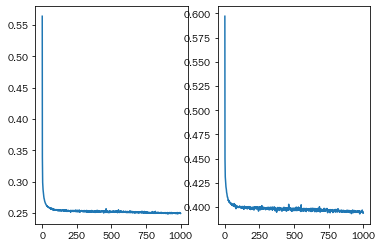

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['mae'])

# Classification with Keras

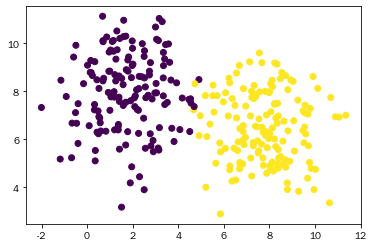

In [ ]:
from sklearn.datasets import make_blobs

N = 300
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2,
                    cluster_std=1.5, random_state=20)

plt.scatter(X[:,0], X[:,1], c=y)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


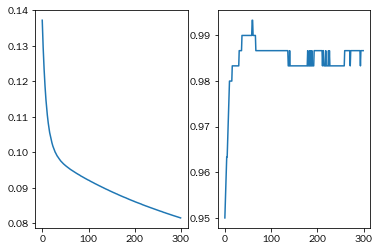

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.001), 
              loss=['binary_crossentropy'], 
              metrics=["accuracy"])
history = model.fit(X, y, epochs=300, verbose=0)
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

# GradientTape()

In [ ]:
x = tf.constant(3.0)

with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        y = x * x
        z = y * y

dz_dx = tape.gradient(z, x)
dy_dx = tape.gradient(y, x)

dz_dx, dy_dx

(<tf.Tensor: shape=(), dtype=float32, numpy=108.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [ ]:
dir(tf)

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 '_API_MODULE',
 '_LazyLoader',
 '__all__',
 '__builtins__',
 '__cached__',
 '__compiler_version__',
 '__cxx11_abi_flag__',
 '__doc__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__monolithic_build__',
 '__name__',
 '__operators__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_absolute_import',
 '_api',
 '_compat',
 '_current_file_location',
 '_current_module',
 '_distutils',
 '_division',
 '_estimator_module',
 '_fi',
 '_inspect',
 '_ll',
 '_logging',
 '_main_dir',
 '_major_api_version',
 '_module_dir',
 '